# 鐵達尼生存預測

## 載入資料

In [53]:
import seaborn as sns
import pandas as pd

In [54]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 資料探索

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [56]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
df.describe(include='O')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [58]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [60]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

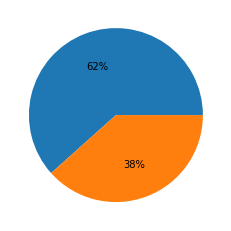

In [61]:
import matplotlib.pyplot as plt

plt.pie(df['survived'].value_counts(), autopct='%.0f%%');

<AxesSubplot:xlabel='age', ylabel='Count'>

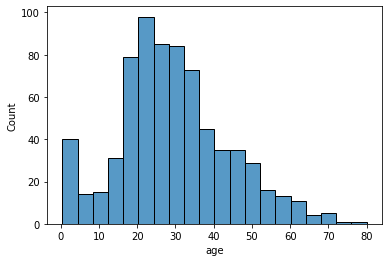

In [62]:
sns.histplot(data=df.age)

## 資料清理

In [63]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [64]:
# df.age = df.age.fillna(df.age.median())
df.age.fillna(df.age.median(), inplace=True)

In [65]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [66]:
df.drop('deck', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [67]:
df[pd.isna(df.embark_town)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True


In [68]:
df.loc[[61-1, 829-1]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,Cherbourg,no,True
828,1,3,male,28.0,0,0,7.7500,Q,Third,man,True,Queenstown,yes,True


In [69]:
df.embarked.fillna(method='ffill', inplace=True)
df.loc[[61, 829]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,C,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,Q,First,woman,False,NaN,yes,True


In [70]:
df.loc[[61+1, 829+1]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,Southampton,no,False
830,1,3,female,15.0,1,0,14.4542,C,Third,child,False,Cherbourg,yes,False


In [71]:
df.embark_town.fillna(method='bfill', inplace=True)
df.loc[[61, 829]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,C,First,woman,False,Southampton,yes,True
829,1,1,female,62.0,0,0,80.0,Q,First,woman,False,Cherbourg,yes,True


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [73]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


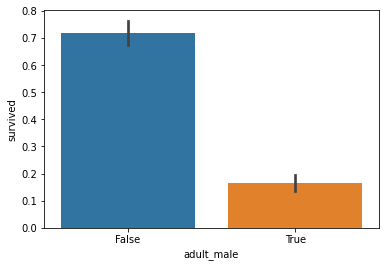

In [74]:
sns.barplot(x='adult_male', y='survived', data=df);

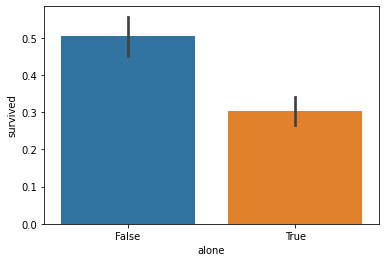

In [75]:
sns.barplot(x='alone', y='survived', data=df);

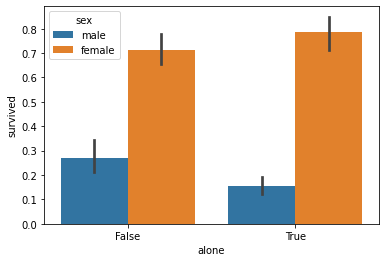

In [76]:
sns.barplot(x='alone', y='survived', hue='sex', data=df);

In [77]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [78]:
df.drop(['embarked', 'class', 'who', 'alive', 'alone'], axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,True,Southampton
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,False,Southampton
3,1,1,female,35.0,1,0,53.1000,False,Southampton
4,0,3,male,35.0,0,0,8.0500,True,Southampton


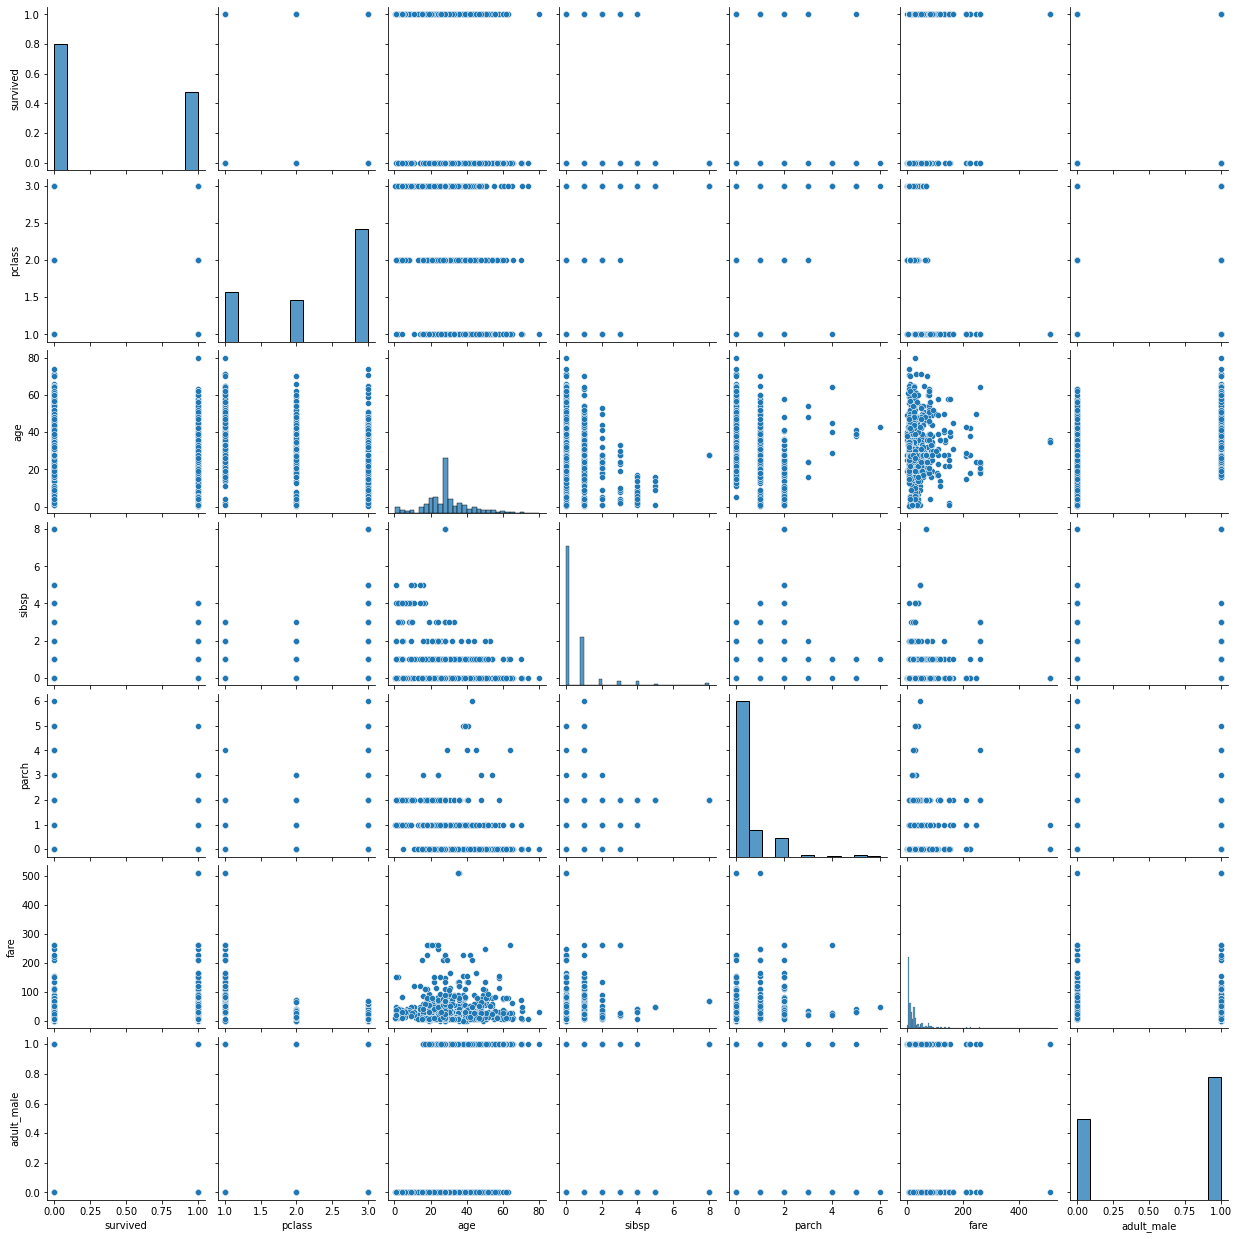

In [79]:
# pairplot 不支援 bool data type
df.adult_male = df.adult_male.astype(int)

sns.pairplot(df);

In [27]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [28]:
df.sex = df.sex.map({'male':1, 'female':0})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
0,0,3,1,22.0,1,0,7.2500,True,Southampton
1,1,1,0,38.0,1,0,71.2833,False,Cherbourg
2,1,3,0,26.0,0,0,7.9250,False,Southampton
3,1,1,0,35.0,1,0,53.1000,False,Southampton
4,0,3,1,35.0,0,0,8.0500,True,Southampton


In [29]:
df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

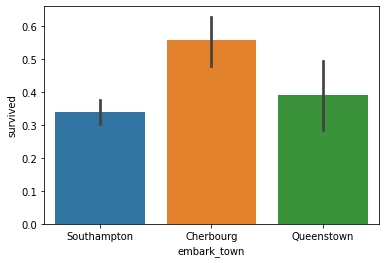

In [30]:
sns.barplot(x='embark_town', y='survived', data=df);

In [31]:
df.embark_town = df.embark_town.map({'Southampton':0, 'Cherbourg':1, 'Queenstown':2})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
0,0,3,1,22.0,1,0,7.2500,True,0
1,1,1,0,38.0,1,0,71.2833,False,1
2,1,3,0,26.0,0,0,7.9250,False,0
3,1,1,0,35.0,1,0,53.1000,False,0
4,0,3,1,35.0,0,0,8.0500,True,0


In [32]:
bins = [0, 12, 18, 25, 35, 60, 100]
cats = pd.cut(df.age, bins)
cats

0      (18, 25]
1      (35, 60]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (18, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age, Length: 891, dtype: category
Categories (6, interval[int64, right]): [(0, 12] < (12, 18] < (18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [33]:
df.age = pd.cut(df.age, bins, labels=range(len(bins)-1))
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
0,0,3,1,2,1,0,7.2500,True,0
1,1,1,0,4,1,0,71.2833,False,1
2,1,3,0,3,0,0,7.9250,False,0
3,1,1,0,3,1,0,53.1000,False,0
4,0,3,1,3,0,0,8.0500,True,0


In [34]:
y = df.survived
X = df.drop('survived', axis=1)

## 資料分割

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

## 特徵縮放

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 模型訓練

In [37]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

## 模型評估

In [38]:
clf.score(X_test, y_test)

0.8547486033519553

## 另一模型評估

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.8100558659217877

## 模型存檔與載入

In [40]:
import joblib

joblib.dump(clf, 'model.joblib')
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [41]:
clf = joblib.load('model.joblib')
scaler = joblib.load('scaler.joblib')

## 模型預測

In [42]:
df.loc[0]

survived          0
pclass            3
sex               1
age               2
sibsp             1
parch             0
fare           7.25
adult_male     True
embark_town       0
Name: 0, dtype: object

In [43]:
df.iloc[0:1]

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
0,0,3,1,2,1,0,7.25,True,0


In [44]:
x_predict = df.iloc[0:1].drop('survived', axis=1).values

clf.predict(x_predict)[0]

0

In [45]:
clf.predict_proba(x_predict)[0]

array([0.98248805, 0.01751195])

In [46]:
x_predict = df.iloc[1:2].drop('survived', axis=1).values

clf.predict(x_predict)[0], clf.predict_proba(x_predict)[0]

(1, array([2.26829802e-05, 9.99977317e-01]))

In [47]:
x_predict = df.iloc[:10].drop('survived', axis=1).values

clf.predict(x_predict), clf.predict_proba(x_predict)

(array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1], dtype=int64),
 array([[9.82488049e-01, 1.75119514e-02],
        [2.26829802e-05, 9.99977317e-01],
        [8.96596015e-01, 1.03403985e-01],
        [6.49304407e-04, 9.99350696e-01],
        [9.73428055e-01, 2.65719451e-02],
        [9.61095165e-01, 3.89048346e-02],
        [2.67686198e-03, 9.97323138e-01],
        [6.98605639e-01, 3.01394361e-01],
        [8.66654296e-01, 1.33345704e-01],
        [5.59376867e-02, 9.44062313e-01]]))